<a href="https://colab.research.google.com/github/raeditio/UBC-ELEC413-2025Fall/blob/main/KLayout_SiEPIC_Tools_Python_SiN_MZI_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Layout of a SiN Mach-Zehnder Interferometer for Hybrid Laser Integration

- for Applied Nanotools + Dream Photonics technology


# Creating layouts by programming KLayout in Python
This tutorial is based on an open source application for creating layouts (KLayout), and open source set of helper scripts in Python (SiEPIC-Tools), and an open source Process Design Kit (PDK) with technology files (SiEPIC-EBeam-PDK).

Note this notebook is for educational purposes. Copy and paste the necessary code segments into your own Python project, using your favourite development environment, e.g., VSCode, Spyder, Jupyter notebook, KLayout's embedded Python, etc.  In Google Collab, File | Save a Copy.

### Software installation (local, or online):

***SiEPIC-EBeam PDK***

> pip install klayout, siepic_ebeam_pdk

Note: This automatically installs the dependancies including ***SiEPIC-Tools***


In [ ]:
try:
    import siepic_ebeam_pdk
except:
    !pip install siepic_ebeam_pdk

# Tutorial

### Create a new layout
 - technology: EBeam
 - top cell name: Top
 - floor plan dimensions (0,0) – (800 µm, 500 µm)
 - database units (1 unit = 0.001 micron = 1 nm, configured in the EBeam technology)

In [ ]:
import pya # KLayout Python API
import SiEPIC  # import module for SiEPIC-Tools, helper functions for KLayout
import siepic_ebeam_pdk  # import module for the SiEPIC-EBeam-PDK technology
from SiEPIC.utils.layout import new_layout

tech_name, top_cell_name = 'EBeam', 'Top'
topcell, ly = new_layout(tech_name, top_cell_name)

# Optional – FYI only
# Get Technology
from SiEPIC.utils import get_technology_by_name
TECHNOLOGY = get_technology_by_name(tech_name)

# Get technology and layer variables
for t in TECHNOLOGY:
    print(f"{t}: {TECHNOLOGY[t]}")


technology_name: EBeam
dbu: 0.001
base_path: /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/siepic_ebeam_pdk
INTC_CML: 
INTC_CML_path: 
INTC_CML_version: 
Waveguide: 1/99
Si: 1/0
SiN: 4/0
Si - 90 nm rib: 2/0
Si_Litho193nm: 1/69
Oxide open (to BOX): 6/0
Text: 10/0
Si N: 20/0
Si N++: 24/0
M1_heater: 11/0
M2_router: 12/0
M_Open: 13/0
VC: 40/0
FloorPlan: 99/0
Deep Trench: 201/0
Isolation Trench: 203/0
Dicing: 210/0
Chip design area: 290/0
Keep out: 202/0
SEM: 200/0
DevRec: 68/0
PinRec: 1/10
PinRecM: 1/11
FbrTgt: 81/0
Errors: 999/0
Lumerical: 733/0
BlackBox: 998/0
Laser: 131/155
libraries: ['EBeam']


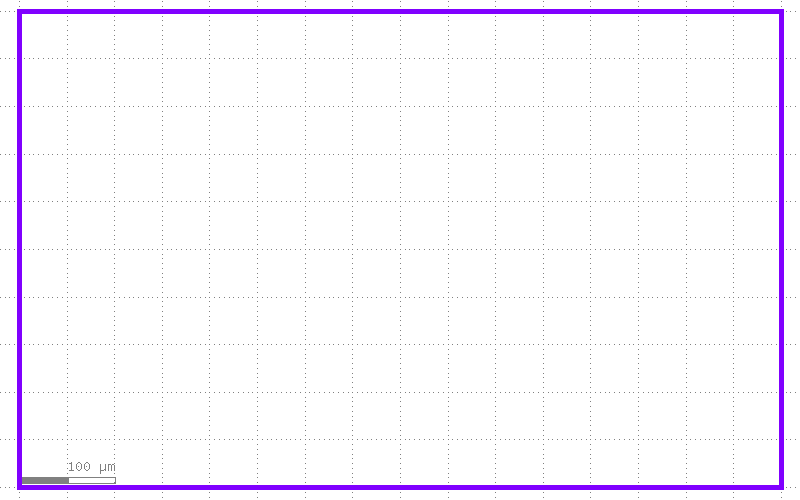

In [ ]:
from SiEPIC.utils.layout import floorplan
floorplan(topcell, 800e3, 500e3)
topcell.plot(width = 400)

### Create a blank cell in the layout
- name: cell
- Instantiate it as a subcell of the top cell at position (0,0) database units
- record the instance in a variable (inst_cell) so we can manipulate or query it later if necessary

In [ ]:
# Create a cell named 'cell', and
# instantiate it under the top cell at position (0,0)
subcell = ly.create_cell('cell')
t = pya.Trans(pya.Trans.R0, 0,0)
inst_cell = topcell.insert(
    pya.CellInstArray(subcell.cell_index(), t))

# Print list of cells
for i in range(ly.cells()):
    print(f" -{ly.cell(i).name}")


 -Top
 -FloorPlan
 -cell


### Place cells from the PDK
- use SiEPIC create_cell2 function, which is an enhanced version (error checking) of pya.Layout.create_cell
- Instantiate it in the subcell at position (40 µm, 15 µm) or (40e3, 15e3) database units
- record the instance in a variable (inst_gc1) so we can manipulate or query it later if necessary

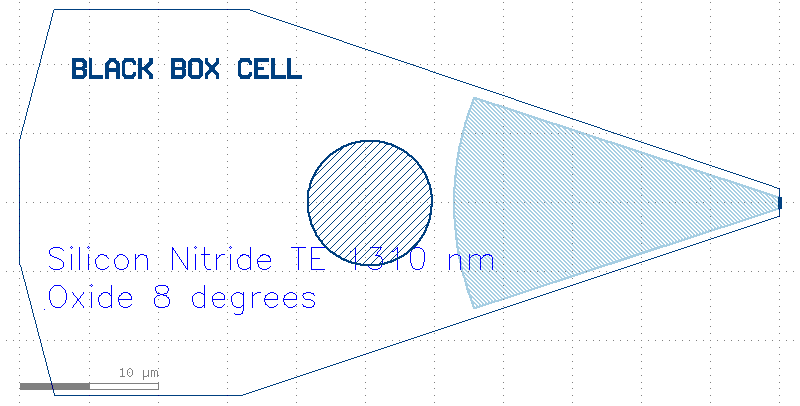

In [ ]:
# Use SiEPIC function create_cell2 to add a cell
from SiEPIC.utils import create_cell2
cell = create_cell2(ly, 'GC_SiN_TE_1310_8degOxide_BB', 'EBeam-SiN')

cell.plot(width=400)

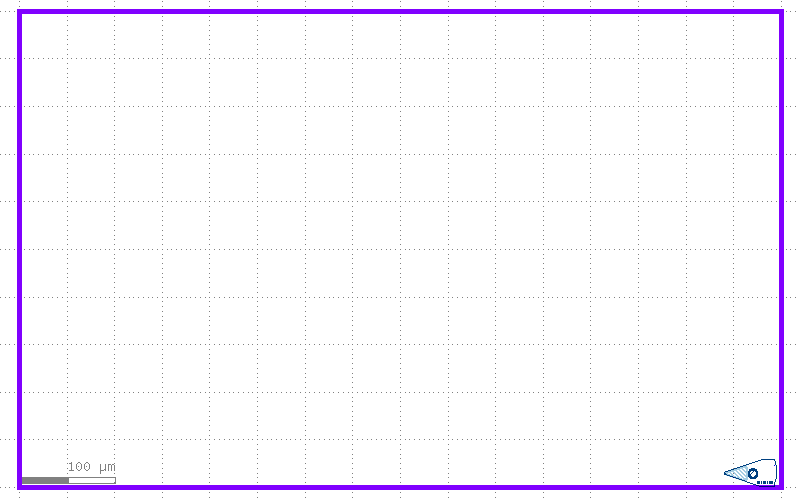

In [ ]:
# Instantiate it in the layout with position and rotation
t = pya.Trans(pya.Trans.R180, 740e3, 15e3)
inst_gc1 = subcell.insert(
    pya.CellInstArray(cell.cell_index(), t))

topcell.plot(width = 400)

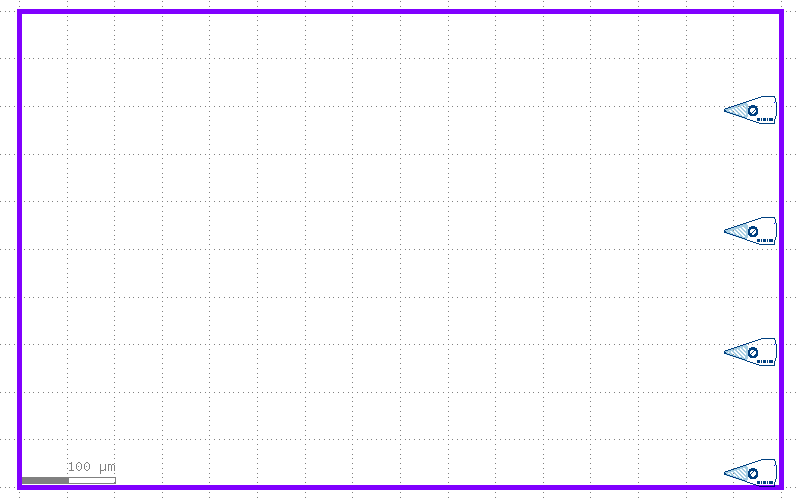

In [ ]:
# add three more grating couplers
t = pya.Trans(pya.Trans.R180, 740e3,15e3 + 127e3 * 1)
inst_gc2 = subcell.insert(pya.CellInstArray(cell.cell_index(), t))
t = pya.Trans(pya.Trans.R180, 740e3,15e3 + 127e3 * 2)
inst_gc3 = subcell.insert(pya.CellInstArray(cell.cell_index(), t))
t = pya.Trans(pya.Trans.R180, 740e3,15e3 + 127e3 * 3)
inst_gc4 = subcell.insert(pya.CellInstArray(cell.cell_index(), t))

topcell.plot(width = 400)

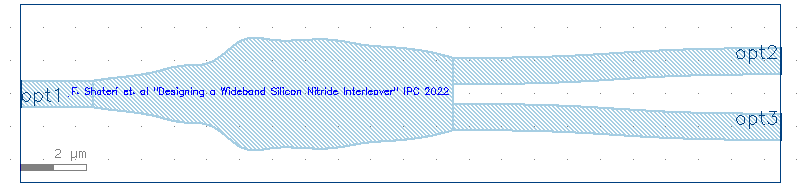

In [ ]:
# Add a Y-Branch
cell = create_cell2(ly, 'ebeam_YBranch_te1310', 'EBeam-SiN')

cell.plot(width=400)


In [ ]:

# Find pins
pins = cell.find_pins()
for p in pins[0]:
    print(f" - Pin: {p.pin_name}, {p.center}")


 - Pin: opt2, 15500,1000
 - Pin: opt3, 15500,-1000
 - Pin: opt1, -7690,0


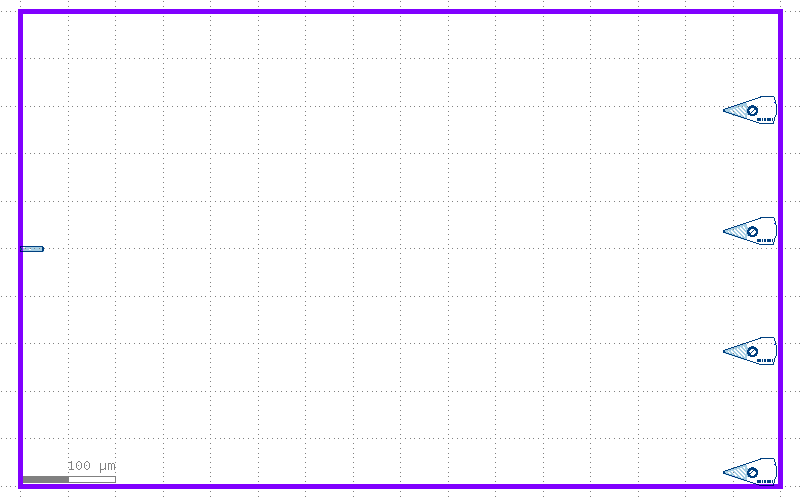

In [ ]:
# Instantiate the YBranch opt1 port at (0,250)
# Use the pin location as an offset
t = pya.Trans(pya.Trans.R0,
              - cell.find_pin('opt1').center
              + pya.Vector(0,250e3) )
inst_y = subcell.insert(
    pya.CellInstArray(cell.cell_index(), t))

topcell.plot(width = 400)

In [ ]:
# Find out what types of waveguides are defined in the PDK
from SiEPIC.utils import load_Waveguides_by_Tech
waveguide_types = load_Waveguides_by_Tech(tech_name)

print('Waveguide types:')
wg_type = None
for w in waveguide_types:
    if 'SiN' in w['name']:
        print(f"  {w['name']}")
        if '1310' in w['name'] and 'w=800' in w['name']:
            wg_type = w['name']
print(f"Desired waveguide: {wg_type}")

Waveguide types:
  SiN Strip TE 895 nm, w=450 nm
  SiN Strip TE 1550 nm, w=750 nm
  SiN Strip TE 1550 nm, w=800 nm
  SiN Strip TE 1550 nm, w=1000 nm
  SiN Strip TM 1550 nm, w=1000 nm
  SiN Strip TE 1310 nm, w=750 nm
  SiN Strip TE 1310 nm, w=800 nm
  SiN Strip TM 1310 nm, w=750 nm
  Multimode SiN Strip TE 1550 nm, w=3000 nm
  SiN routing TE 1550 nm (compound waveguide)
Desired waveguide: SiN Strip TE 1310 nm, w=800 nm


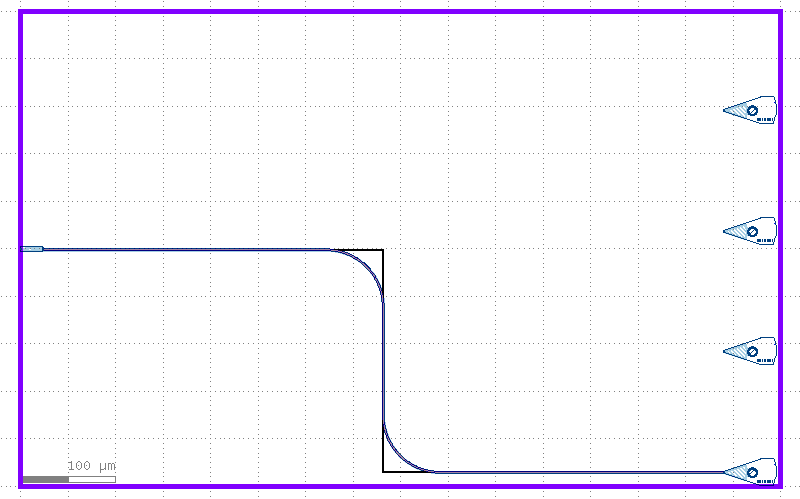

In [ ]:
# Draw a waveguide path from one instance pin to another
from SiEPIC.scripts import connect_pins_with_waveguide
wg = connect_pins_with_waveguide(inst_y, 'opt3',
                                 inst_gc1, 'opt1',
                                 waveguide_type=wg_type,
                                )
topcell.plot(width = 400)


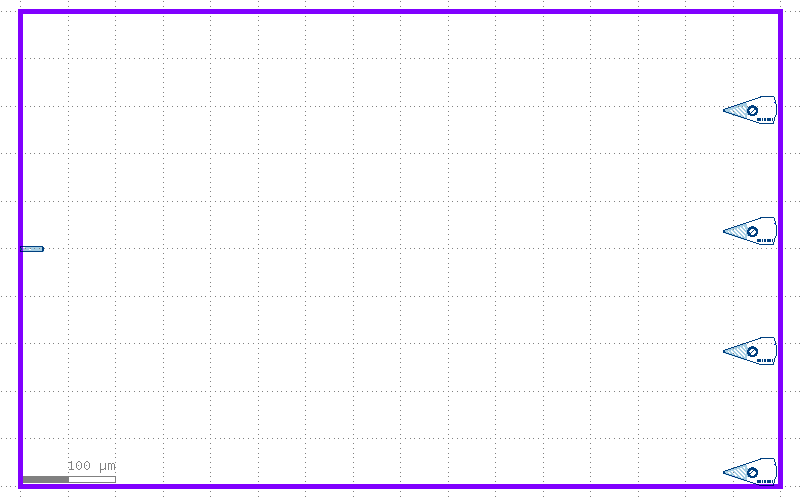

In [ ]:
# Delete the waveguide cell, if you don't like it
# 1) Waveguide bend is in the middle
# 2)
ly.delete_cell(wg.cell_index)
topcell.plot(width = 400)

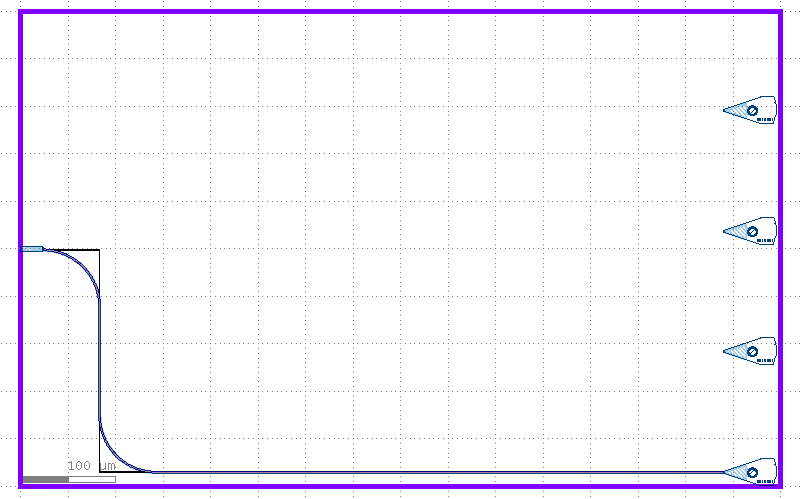

In [ ]:
# Draw a waveguide path from one instance pin to another,
# with a "turtle" for navigation
# https://github.com/SiEPIC/SiEPIC-Tools/wiki/Scripted-Layout#adding-a-waveguide-between-components
from SiEPIC.scripts import connect_pins_with_waveguide
wg = connect_pins_with_waveguide(inst_y, 'opt3',
                                 inst_gc1, 'opt1',
                                 waveguide_type=wg_type,
                                 turtle_A=[60, -90,
                                           0, 0]
                                )
topcell.plot(width = 400)


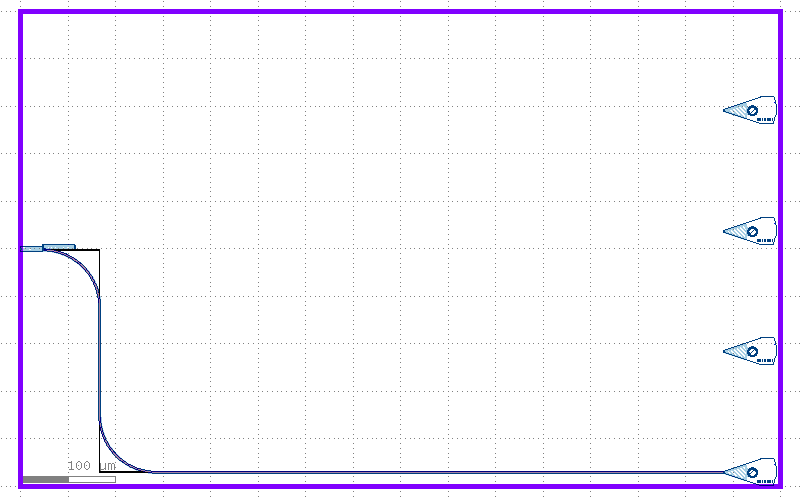

In [ ]:
# Connect a 2x2 splitter to the output of the 1x2
cell_2x2 = create_cell2(ly,
            'ebeam_MMI_2x2_5050_te1310', 'EBeam-SiN')

# Connect a cell, to an instance
from SiEPIC.scripts import connect_cell
inst_2x2a = connect_cell(inst_y, 'opt2', cell_2x2, 'opt2')

topcell.plot(width = 400)

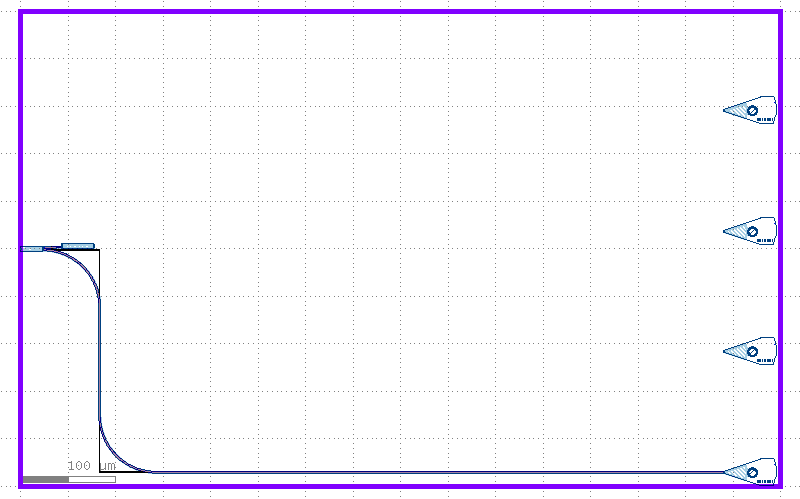

In [ ]:
# Move the component, so that we leave space for a waveguide S-bend
inst_2x2a.transform(pya.Trans(20e3,1e3))

# Add waveguide
wg = connect_pins_with_waveguide(inst_y, 'opt2',
                                 inst_2x2a, 'opt2',
                                 waveguide_type=wg_type,
                                )
topcell.plot(width = 400)


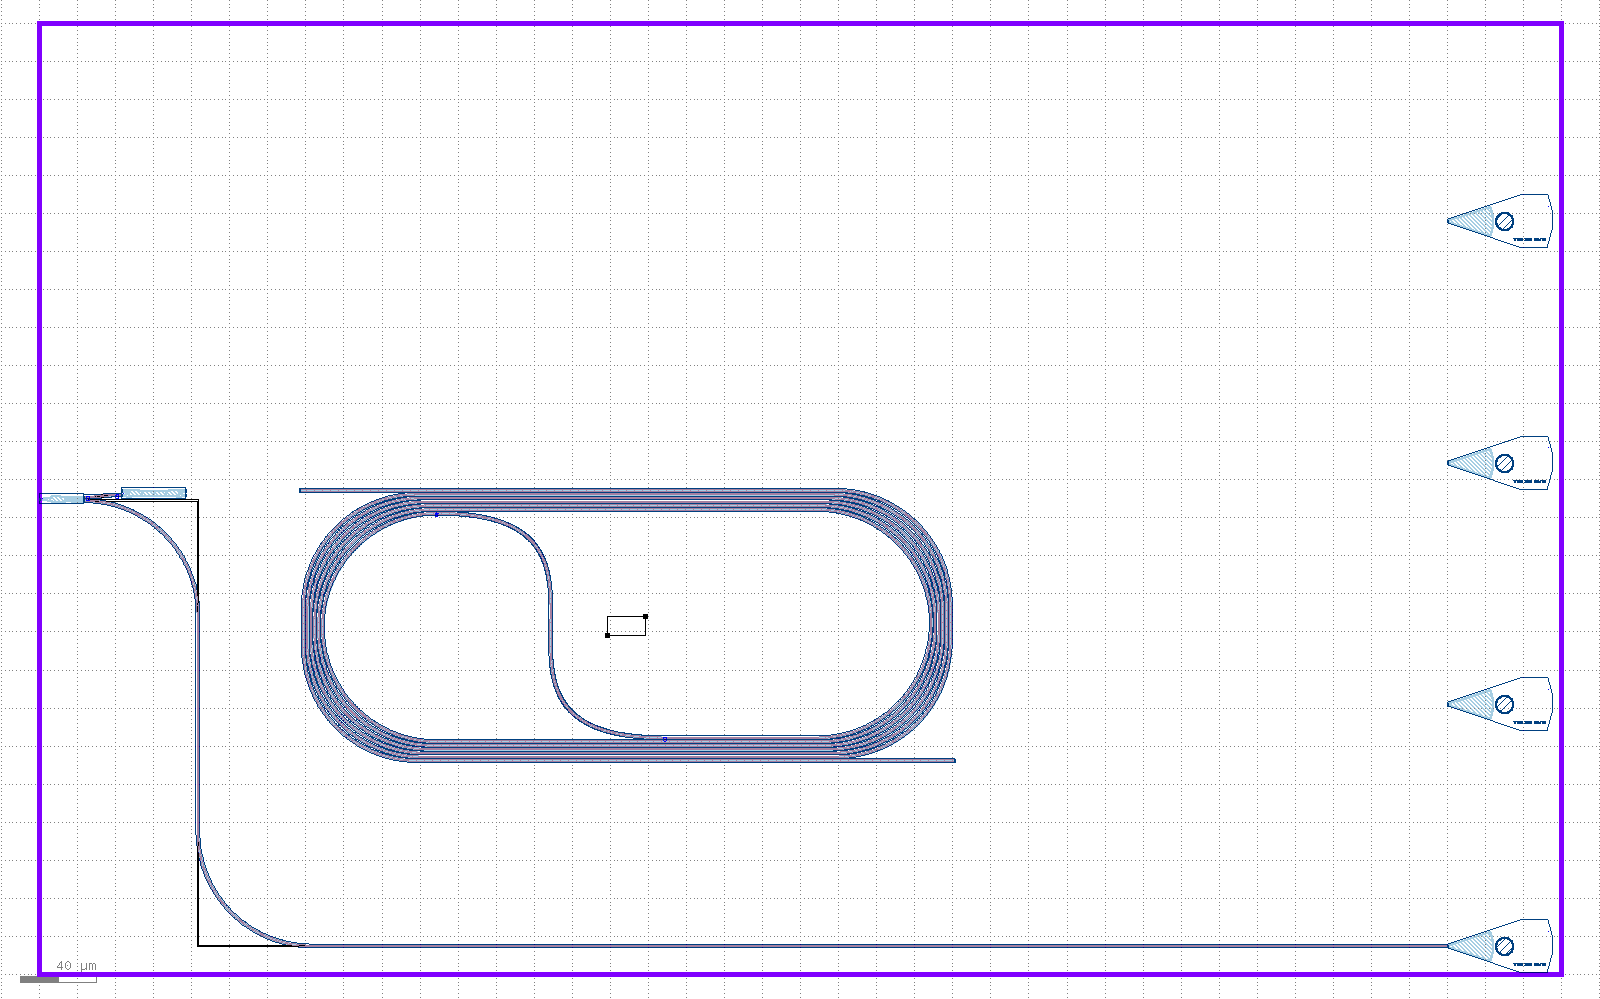

In [ ]:
# Create the Cell, with parameters
cell_spiral = ly.create_cell('spiral_paperclip', 'EBeam_Beta',
                       {'ports_opposite':True,
                        'loops':3,
                        'length':160,
                        'waveguide_type':wg_type,
                        'flatten':True} # required for scripting
                       )

# Connect the spiral to the 2x2 splitter
inst_spiral = connect_cell(inst_2x2a, 'opt3', cell_spiral, 'opt1')

# Move the spiral, so we do not have overlapping waveguides
inst_spiral.transform(pya.Trans(60e3,0))

topcell.plot() # in the browser


In [ ]:
topcell.show() # in KLayout


Message from klive: {"version": "0.2.2", "type": "open", "file": "/var/folders/2_/hfctv7kn7h965wdl4jgrm8t80000gn/T/tmp8c5mszny/Top.gds"}
